In [65]:
from os import walk
import re
from os.path import join, split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

from os import makedirs

# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

In [2]:
sadc = ['Angola', 'Botswana', 'Comoros', 'Democratic_Republic_of_Congo',
        'Eswatini', 'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique',
        'Namibia', 'South_Africa', 'Tanzania', 'Zambia', 'Zimbabwe', 'Seychelles']

files = []
for country in sadc:
    data_path = country + '/results/'

    for (dirpath, _, filenames) in walk(data_path):
        files += [join(dirpath, file) for file in filenames]
        break

files

['Angola/results/multiple_runs_cases.pkl',
 'Angola/results/multiple_runs_deaths.pkl',
 'Botswana/results/multiple_runs_cases.pkl',
 'Botswana/results/multiple_runs_deaths.pkl',
 'Comoros/results/multiple_runs_cases.pkl',
 'Comoros/results/multiple_runs_deaths.pkl',
 'Democratic_Republic_of_Congo/results/multiple_runs_cases.pkl',
 'Democratic_Republic_of_Congo/results/multiple_runs_deaths.pkl',
 'Eswatini/results/multiple_runs_cases.pkl',
 'Eswatini/results/multiple_runs_deaths.pkl',
 'Lesotho/results/multiple_runs_cases.pkl',
 'Lesotho/results/multiple_runs_deaths.pkl',
 'Madagascar/results/multiple_runs_cases.pkl',
 'Madagascar/results/multiple_runs_deaths.pkl',
 'Malawi/results/multiple_runs_cases.pkl',
 'Malawi/results/multiple_runs_deaths.pkl',
 'Mauritius/results/multiple_runs_cases.pkl',
 'Mauritius/results/multiple_runs_deaths.pkl',
 'Mozambique/results/multiple_runs_cases.pkl',
 'Mozambique/results/multiple_runs_deaths.pkl',
 'Namibia/results/multiple_runs_cases.pkl',
 'Namibi

In [3]:
# all trials for all countries
regexs = ['.*cases*', '.*deaths*']
for regex in regexs:
    r = re.compile(regex)
    vars()["{}_results".format(regex.split('*')[1])] = {}
    files_filter = list(filter(r.match, files))
    for file in files_filter:
        vars()["{}_results".format(regex.split('*')[1])][file.split('/')[0]] = pd.read_pickle(file)
        

In [4]:
# accuracy for all countries (averaged trials)
cases_acc = pd.DataFrame(columns = cases_results[list(cases_results.keys())[0]].columns, index = list(cases_results.keys())) # initialize
deaths_acc = pd.DataFrame(columns = deaths_results[list(deaths_results.keys())[0]].columns, index = list(deaths_results.keys())) # initialize
for key in list(deaths_results.keys()): # for each country
    cases_acc.loc[key] = cases_results[key].mean(axis = 0)
    deaths_acc.loc[key] = deaths_results[key].mean(axis = 0)


In [14]:
# accuracy for all sadc (averaged trials, avergaed countries)

cases_sadc = cases_acc.mean(axis = 0)
deaths_sadc = deaths_acc.mean(axis = 0)

In [5]:
# tables
# bargraphs *
# maps *
# distributions

In [21]:
deaths_acc.filter(like = 'mase', axis = 1).filter(like = 'South', axis = 0)

,mase_meslstm,mase_lstm,mase_varmax,mase_sarimax,mase_mlr
South_Africa,4894.76575,8531.802894,369895.640169,561.283512,1043.729167


### South Africa

In [7]:
save_path = 'figures/'
makedirs(save_path, exist_ok = True)

objects = ('MES_LSTM', 'LSTM', 'VARMAX', 'SARIMAX', 'MLR')
y_pos = np.arange(len(objects))
bar_width = 0.35
opacity = 0.85

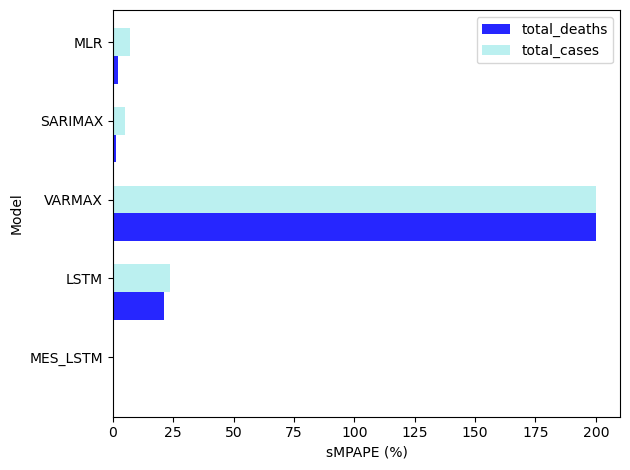

In [8]:
total_cases = cases_acc.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths = deaths_acc.filter(like = 'smape', axis = 1).filter(like = 'South', axis = 0).values[0]

# create plot
fig, ax = plt.subplots()

rects1 = plt.barh(y_pos, total_deaths, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')

rects2 = plt.barh(y_pos + bar_width, total_cases, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')


plt.xlabel('sMPAPE (%)')
plt.ylabel('Model')
# plt.title('sMAPE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.savefig(save_path + 'smape_01.pdf', dpi = 600)
plt.show()

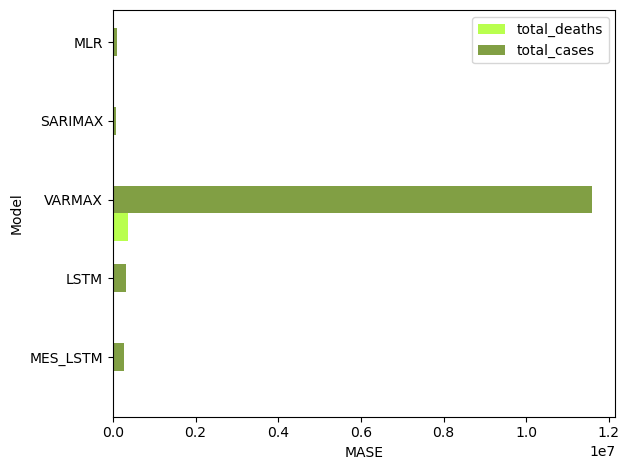

In [9]:
#TODO put these in a table and narate that graph is scaled for better...

total_cases = cases_acc.filter(like = 'mase', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths = deaths_acc.filter(like = 'mase', axis = 1).filter(like = 'South', axis = 0).values[0]


# create plot
fig, ax = plt.subplots()

rects1 = plt.barh(y_pos, total_deaths.reshape(1, -1)[0], bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')

rects2 = plt.barh(y_pos + bar_width, total_cases.reshape(1, -1)[0], bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')


plt.xlabel('MASE')
plt.ylabel('Model')
# plt.title('nMASE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.savefig(save_path + 'mase_01.pdf', dpi = 600)
plt.show()

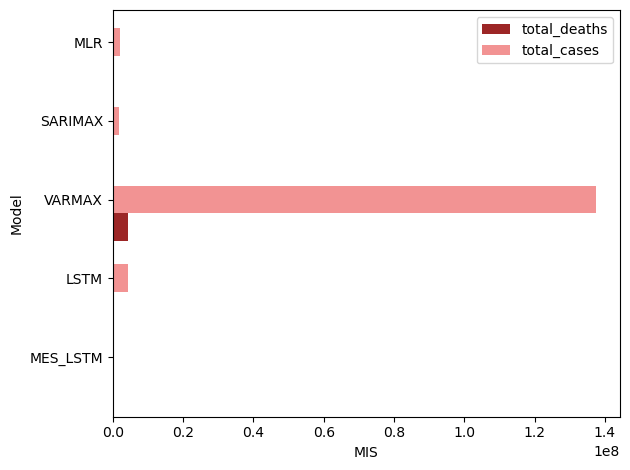

In [10]:
total_cases = cases_acc.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths = deaths_acc.filter(like = 'mis', axis = 1).filter(like = 'South', axis = 0).values[0]


# create plot
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.85

rects1 = plt.barh(y_pos, total_deaths.reshape(1, -1)[0], bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')

rects2 = plt.barh(y_pos + bar_width, total_cases.reshape(1, -1)[0], bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')


plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.savefig(save_path + 'mis_01.pdf', dpi = 600)
plt.show()

# large intervals for MES-RNN?

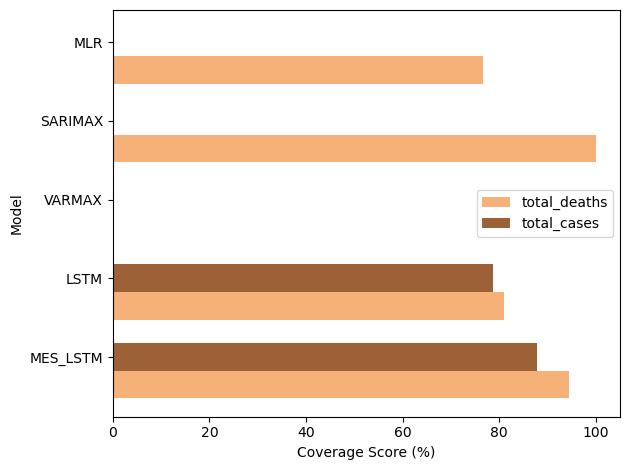

In [11]:
total_cases = cases_acc.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]
total_deaths = deaths_acc.filter(like = 'cov', axis = 1).filter(like = 'South', axis = 0).values[0]

# create plot
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.85

rects1 = plt.barh(y_pos, total_deaths, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')

rects2 = plt.barh(y_pos + bar_width, total_cases, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')


plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('coverage score for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 'best') #TODO

plt.tight_layout()
plt.savefig(save_path + 'coverage_01.pdf', dpi = 600)
plt.show()

### SADC

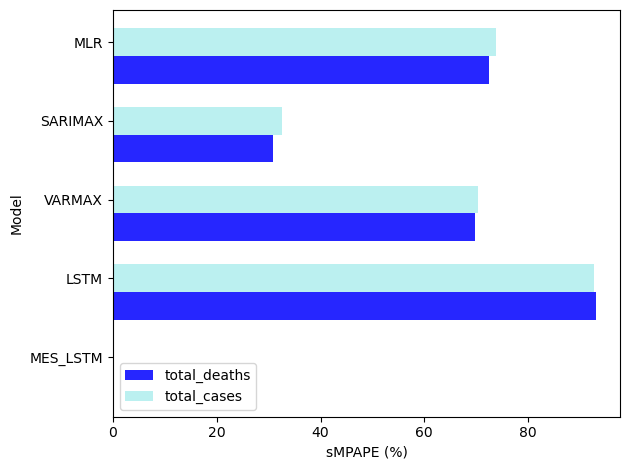

In [19]:
total_cases = cases_sadc.filter(like = 'smape').values
total_deaths = deaths_sadc.filter(like = 'smape').values

# create plot
fig, ax = plt.subplots()

rects1 = plt.barh(y_pos, total_deaths, bar_width,
alpha = opacity,
color = 'b',
label = 'total_deaths')

rects2 = plt.barh(y_pos + bar_width, total_cases, bar_width,
alpha=opacity,
color='paleturquoise',
label='total_cases')


plt.xlabel('sMPAPE (%)')
plt.ylabel('Model')
# plt.title('sMAPE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.savefig(save_path + 'smape_02.pdf', dpi = 600)
plt.show()

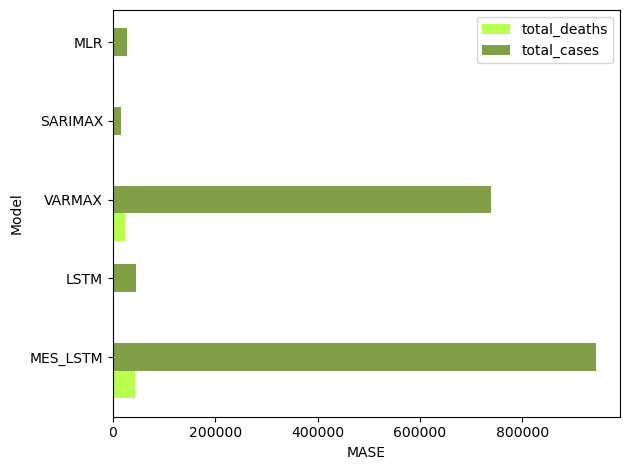

In [20]:
total_cases = cases_sadc.filter(like = 'mase').values
total_deaths = deaths_sadc.filter(like = 'mase').values


# create plot
fig, ax = plt.subplots()

rects1 = plt.barh(y_pos, total_deaths.reshape(1, -1)[0], bar_width,
alpha = opacity,
color = 'greenyellow',
label = 'total_deaths')

rects2 = plt.barh(y_pos + bar_width, total_cases.reshape(1, -1)[0], bar_width,
alpha=opacity,
color='olivedrab',
label='total_cases')


plt.xlabel('MASE')
plt.ylabel('Model')
# plt.title('nMASE for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.savefig(save_path + 'mase_02.pdf', dpi = 600)
plt.show()

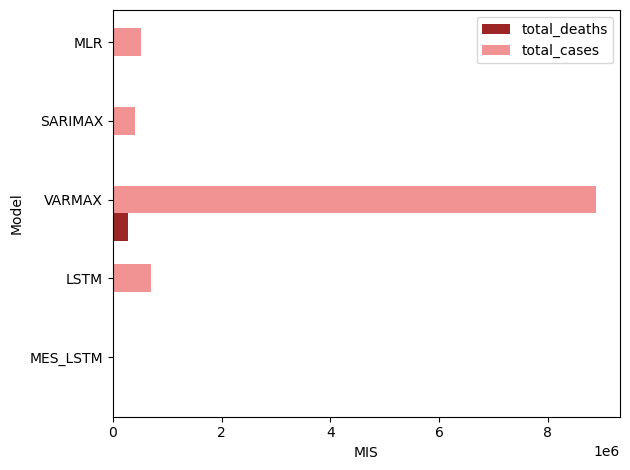

In [22]:
total_cases = cases_sadc.filter(like = 'mis').values
total_deaths = deaths_sadc.filter(like = 'mis').values


# create plot
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.85

rects1 = plt.barh(y_pos, total_deaths.reshape(1, -1)[0], bar_width,
alpha = opacity,
color = 'darkred',
label = 'total_deaths')

rects2 = plt.barh(y_pos + bar_width, total_cases.reshape(1, -1)[0], bar_width,
alpha=opacity,
color='lightcoral',
label='total_cases')


plt.xlabel('MIS')
plt.ylabel('Model')
# plt.title('nMIS for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend()

plt.tight_layout()
plt.savefig(save_path + 'mis_02.pdf', dpi = 600)
plt.show()

# large intervals for MES-RNN?

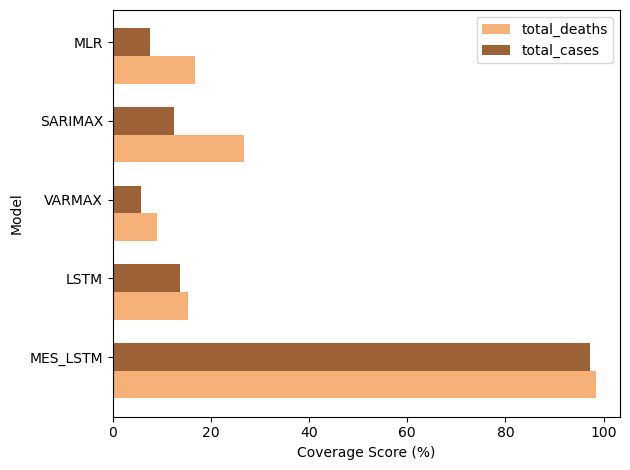

In [23]:
total_cases = cases_sadc.filter(like = 'cov').values
total_deaths = deaths_sadc.filter(like = 'cov').values

# create plot
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.85

rects1 = plt.barh(y_pos, total_deaths, bar_width,
alpha = opacity,
color = 'sandybrown',
label = 'total_deaths')

rects2 = plt.barh(y_pos + bar_width, total_cases, bar_width,
alpha=opacity,
color='saddlebrown',
label='total_cases')


plt.xlabel('Coverage Score (%)')
plt.ylabel('Model')
# plt.title('coverage score for South Africa')
plt.yticks(y_pos + bar_width, objects)
plt.legend(loc = 'best') #TODO

plt.tight_layout()
plt.savefig(save_path + 'coverage_02.pdf', dpi = 600)
plt.show()

In [39]:
sadc_map = ['Angola', 'Botswana', 'Comoros', 'Democratic Republic of the Congo', 'Swaziland',
        'Lesotho', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia',
        'Seychelles', 'South Africa', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe']

In [40]:
cases_smape = cases_acc.filter(like = 'smape_mes', axis = 1).values[:, 0]
deaths_smape = deaths_acc.filter(like = 'smape_mes', axis = 1).values[:, 0]
cases_mis = cases_acc.filter(like = 'mis_mes', axis = 1).values[:, 0]
deaths_mis = deaths_acc.filter(like = 'mis_mes', axis = 1).values[:, 0]

In [43]:
maps = pd.DataFrame(columns = ['country', 'cases_smape', 'cases_mis', 'deaths_smape', 'deaths_mis'])
maps['country'], maps['cases_smape'], maps['cases_mis'], maps['deaths_smape'], maps['deaths_mis'] = sadc_map, cases_smape, cases_mis, deaths_smape, deaths_mis

maps

,country,cases_smape,cases_mis,deaths_smape,deaths_mis
0,Angola,0.012389,2015.07905,0.012523,58.952356
1,Botswana,0.005484,8004.762335,0.004738,113.619521
2,Comoros,0.040567,162.905506,0.019636,6.181726
3,Democratic Republic of the Congo,0.036164,2353.448151,0.00418,44.90458
4,Swaziland,0.00804,1860.229433,0.038905,48.410476
5,Lesotho,0.02872,889.775749,0.013481,25.771978
6,Madagascar,0.006729,2238.647895,0.003851,57.878111
7,Malawi,0.001918,2928.653349,0.002549,108.068336
8,Mauritius,0.725707,924.428347,0.014395,2.581813
9,Mozambique,0.014442,7521.512448,0.098907,97.953661


In [59]:
# Load the json file with county coordinates

#geoData = gpd.read_file('https://datahub.io/core/geo-countries/r/countries.geojson')
geoData = gpd.read_file('countries.geojson')

In [62]:
sadcData = geoData[geoData.ADMIN.isin(sadc_map)]
sadcData

,ADMIN,ISO_A3,geometry
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
37,Botswana,BWA,"POLYGON ((25.25978 -17.79411, 25.21937 -17.879..."
47,Democratic Republic of the Congo,COD,"MULTIPOLYGON (((12.99459 -5.86824, 12.96930 -5..."
51,Comoros,COM,"MULTIPOLYGON (((43.84295 -12.37347, 43.81935 -..."
135,Lesotho,LSO,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908..."
144,Madagascar,MDG,"MULTIPOLYGON (((49.84449 -17.07220, 49.82618 -..."
155,Mozambique,MOZ,"MULTIPOLYGON (((32.97511 -26.00945, 32.96453 -..."
158,Mauritius,MUS,"MULTIPOLYGON (((57.71388 -20.09612, 57.71795 -..."
159,Malawi,MWI,"MULTIPOLYGON (((34.71161 -12.12081, 34.68897 -..."
161,Namibia,NAM,"POLYGON ((13.18491 -16.96418, 13.19814 -16.957..."


In [64]:
maps_full = sadcData.merge(maps, left_on=['ADMIN'], right_on=['country'])
maps_full

,ADMIN,ISO_A3,geometry,country,cases_smape,cases_mis,deaths_smape,deaths_mis
0,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",Angola,0.012389,2015.07905,0.012523,58.952356
1,Botswana,BWA,"POLYGON ((25.25978 -17.79411, 25.21937 -17.879...",Botswana,0.005484,8004.762335,0.004738,113.619521
2,Democratic Republic of the Congo,COD,"MULTIPOLYGON (((12.99459 -5.86824, 12.96930 -5...",Democratic Republic of the Congo,0.036164,2353.448151,0.00418,44.90458
3,Comoros,COM,"MULTIPOLYGON (((43.84295 -12.37347, 43.81935 -...",Comoros,0.040567,162.905506,0.019636,6.181726
4,Lesotho,LSO,"POLYGON ((28.98085 -28.90904, 28.99542 -28.908...",Lesotho,0.02872,889.775749,0.013481,25.771978
5,Madagascar,MDG,"MULTIPOLYGON (((49.84449 -17.07220, 49.82618 -...",Madagascar,0.006729,2238.647895,0.003851,57.878111
6,Mozambique,MOZ,"MULTIPOLYGON (((32.97511 -26.00945, 32.96453 -...",Mozambique,0.014442,7521.512448,0.098907,97.953661
7,Mauritius,MUS,"MULTIPOLYGON (((57.71388 -20.09612, 57.71795 -...",Mauritius,0.725707,924.428347,0.014395,2.581813
8,Malawi,MWI,"MULTIPOLYGON (((34.71161 -12.12081, 34.68897 -...",Malawi,0.001918,2928.653349,0.002549,108.068336
9,Namibia,NAM,"POLYGON ((13.18491 -16.96418, 13.19814 -16.957...",Namibia,0.043616,5034.337773,0.147728,139.26301


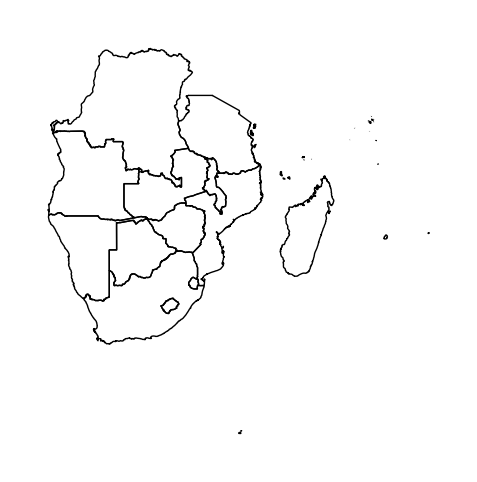

In [71]:
gplt.polyplot(sadcData);

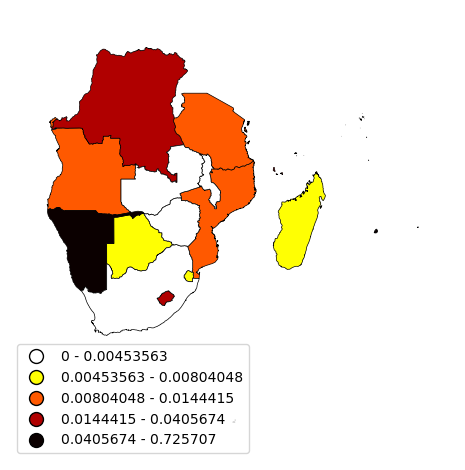

In [75]:
# initialize the figure
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))
fig, ax = plt.subplots(1, 1)

# set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(maps_full['cases_smape'], k = 5)

# map
gplt.choropleth(maps_full, 
    hue="cases_smape", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

# ax.set_title('sMAPE for Individual Countries for total_cases');

plt.tight_layout()
plt.savefig(save_path + 'map_01.pdf', dpi = 600)
plt.show()

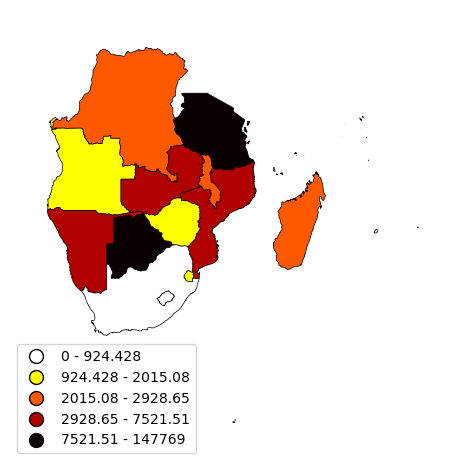

In [76]:
# initialize the figure
fig, ax = plt.subplots(1, 1)

# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['cases_mis'], k = 5)

# map
gplt.choropleth(maps_full, 
    hue="cases_mis", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

# ax.set_title('MIS for Each Country for total_cases')

plt.tight_layout()
plt.savefig(save_path + 'map_02.pdf', dpi = 600)
plt.show()

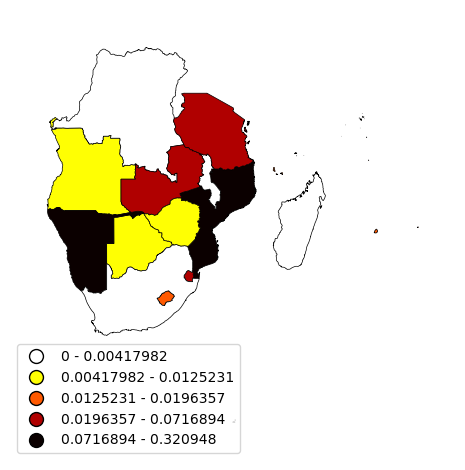

In [77]:
# initialize the figure
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))
fig, ax = plt.subplots(1, 1)

# set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(maps_full['deaths_smape'], k = 5)

# map
gplt.choropleth(maps_full, 
    hue="deaths_smape", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

# ax.set_title('sMAPE for Individual Countries for total_deaths');

plt.tight_layout()
plt.savefig(save_path + 'map_03.pdf', dpi = 600)
plt.show()

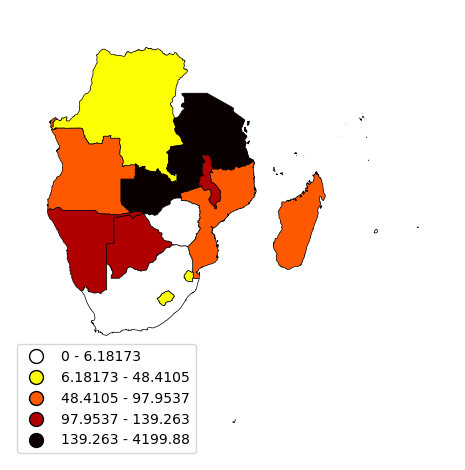

In [84]:
# initialize the figure
fig, ax = plt.subplots(1, 1)

# set up the color sheme:
import mapclassify as mc
# scheme = mc.Quantiles(range(0, 101), k = 5)
scheme = mc.Quantiles(maps_full['deaths_mis'], k = 5)

# map
gplt.choropleth(maps_full, 
    hue="deaths_mis", 
    linewidth=.5,
    scheme=scheme, cmap='hot_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

# ax.set_title('MIS for Each Country for total_deaths')

plt.tight_layout()
plt.savefig(save_path + 'map_04.pdf', dpi = 600)
plt.show()

In [85]:
cases_acc

,smape_meslstm,mase_meslstm,mis_meslstm,cov_meslstm,smape_lstm,mase_lstm,mis_lstm,cov_lstm,smape_varmax,mase_varmax,mis_varmax,cov_varmax,smape_sarimax,mase_sarimax,mis_sarimax,cov_sarimax,smape_mlr,mase_mlr,mis_mlr,cov_mlr
Angola,0.012389,42058.819543,2015.07905,99.89418,108.040656,24186.139593,383570.593005,0.42328,64.576184,17006.345108,417523.776074,0.0,14.692725,4790.440976,109561.690262,0.0,112.020494,24958.678639,431829.621035,0.0
Botswana,0.005484,2688.507513,8004.762335,100.0,138.398191,116383.164277,1696716.238104,0.32967,135.827957,115484.641758,1438495.970177,0.0,47.07384,54600.516141,1074062.358562,0.0,148.121521,121418.324851,2222703.389292,0.0
Comoros,0.040567,525.487467,162.905506,95.833333,79.077875,3111.179686,22232.663329,7.5,109.184181,3889.016819,35272.419897,0.0,1.594837,87.606345,534.306036,100.0,85.695201,3311.295547,6558.142034,8.333333
Democratic_Republic_of_Congo,0.036164,686.285837,2353.448151,95.612245,116.301635,22788.982504,497218.184652,1.428571,20.773523,5893.86492,165439.67004,0.0,24.113206,6740.332589,206558.91619,0.0,106.66673,21786.297961,453848.569982,0.0
Eswatini,0.00804,2530.827428,1860.229433,100.0,125.682252,23250.318394,447028.401471,0.204082,101.558895,20429.663778,479720.862663,0.0,77.523415,16951.306133,460053.385161,0.0,109.721281,21454.411761,418846.980871,0.0
Lesotho,0.02872,10616.630683,889.775749,97.763975,84.871598,6371.3129,97171.215392,1.242236,8.184902,848.341781,5933.458769,21.73913,9.191828,948.332451,8152.292204,0.0,26.687224,2515.410878,12875.17504,100.0
Madagascar,0.006729,655.96038,2238.647895,100.0,92.250358,20685.528831,257076.740513,3.915344,17.053382,6179.730257,75115.29464,0.0,1.02146,335.93991,3426.608511,100.0,65.37451,16271.489353,71977.112021,11.111111
Malawi,0.001918,13724836.027316,2928.653349,96.703297,114.456531,30057.600685,604907.505268,0.10989,55.425401,18000.840186,436112.459541,0.0,22.962737,8577.073857,96831.579763,0.0,89.18415,25604.93125,505607.683003,0.0
Mauritius,0.725707,488908.211013,924.428347,85.502646,157.665641,9037.536923,98287.357836,4.867725,144.743238,8619.128467,165269.955229,0.0,104.041478,7100.602049,139082.227661,0.0,148.879857,8756.671985,168629.797137,0.0
Mozambique,0.014442,2306.586486,7521.512448,98.095238,57.157103,33075.976946,615236.246435,19.470899,29.261538,19712.06199,613571.33118,0.0,28.947059,19524.468263,671280.846799,0.0,22.781107,15788.224566,430874.514372,0.0
